In [5]:
from pymeasure.instruments.thorlabs import ThorlabsPM100USB
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
from LowLevelModules.NIdaqAPD import *
import time
from collections import deque

"""#######################################   USER INPUT   #################################################"""
frequency = 5    # Hz
max_data_before_refresh = 30*frequency
save_data = False
wavelength = 535
"""#########################################################################################################"""

delta_t = 1 / frequency

PM = ThorlabsPM100USB('USB0::0x1313::0x8078::P0021814::INSTR')
PM.measure_power(wavelength)

-1.71020346e-07

<IPython.core.display.Javascript object>


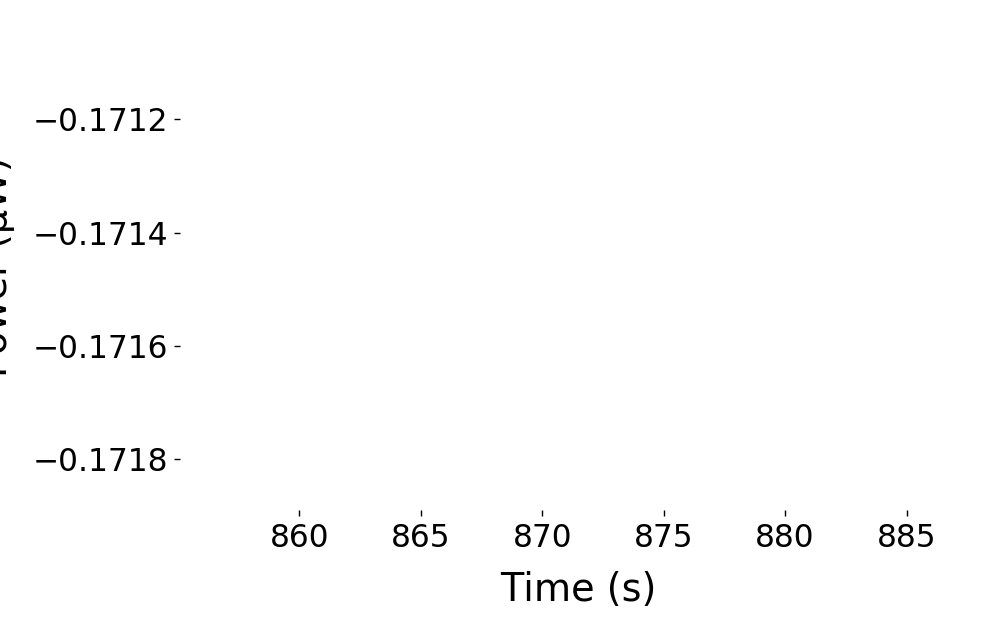

In [3]:
lp = LivePlot(1, 1, 8, 5, 'o', 'Time (s)', 'Power (μW)')
t = deque(maxlen=max_data_before_refresh)
power = deque(maxlen=max_data_before_refresh)
i = 0
while True:
    try:
        t.append(i*delta_t)
        power.append(PM.power*1e6)
        lp.plot_live(t, power)
        time.sleep(delta_t)
        i += 1
    except KeyboardInterrupt:
        # press the stop button to trigger this
        break

plt.show()

In [7]:
print(PM.sensor())

None


In [8]:
PM.power

-1.71411259e-07

In [9]:
PM.wavelength

535.0

In [11]:
PM.wavelength_max

1100.0

In [12]:
PM.wavelength_min

400.0